#Instalando as bibliotecas que serão utilizadas

In [1]:
!pip install -U -q PyDrive

#Importando as bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import warnings
warnings.filterwarnings('ignore')

#Carregando dados da planilha


In [ ]:
# Autenticação para acesso aos dados
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
# Download dos dados para esta máquina virtual
downloaded = drive.CreateFile({'id': '1o1GT8SbqxvdiN8nc_4AXl0Zkklgzr1-t'})
downloaded.GetContentFile('data.csv')

In [ ]:
# Carregando os dados baixados no dataframe 
df = pd.read_csv('data.csv')

Testes


In [ ]:
df.describe()

In [ ]:
df.columns

In [ ]:
df.info()

In [ ]:
df.isnull().sum()/len(df)

In [ ]:
df.vlr_credito.median()

In [ ]:
df.vlr_credito.std()

In [ ]:
df_new = pd.DataFrame(data = {"credito": df.vlr_credito.fillna(0)})
df_new

In [ ]:
df_new.describe()

In [ ]:
import plotly.express as px

px.box(df_new, y="credito")

#Analisando faixas de créditos

In [ ]:
(df[(df['vlr_credito'].isna()) & (df['vlr_score'].isna())]["anomes"].count() + df[(df['vlr_credito'].isna()) & (df['vlr_score'].notna())]["anomes"].count() )/df[df['vlr_credito'].isna()]["anomes"].count()

1.0

In [ ]:
df[(df['vlr_credito'].isna()) & (df['vlr_score'].isna())]["anomes"].count()

2855479

In [ ]:
df[(df['vlr_credito'].isna()) & (df['vlr_score'].notna())]["anomes"].count()

2617340

In [ ]:
df[df['vlr_credito'].isna()]["anomes"].count()

5472819

In [ ]:
df.shape

(12505293, 13)

<h3>Clientes que não possuem dados de créditos

Descrição geral

In [ ]:
df[df['vlr_credito'].isna()].describe()

,anomes,vlr_credito,vlr_saldo,num_atend_atrs,vlr_score,num_produtos,num_atend,qtd_oper,qtd_reclm,qtd_restr
count,5.472819e+06,0.0,5.534600e+05,299.000000,2.617340e+06,158557.000000,1625.000000,0.0,103.0,5.053165e+06
mean,2.021382e+05,NaN,6.576012e+03,1.083612,3.739851e+02,2.247394,1.352615,NaN,1.0,2.718076e+00
std,4.410153e+01,NaN,9.083314e+04,0.361344,1.543755e+02,1.436334,0.665360,NaN,0.0,3.578588e+00
min,2.021040e+05,NaN,1.000000e-02,1.000000,0.000000e+00,1.000000,1.000000,NaN,1.0,1.000000e+00
25%,2.021070e+05,NaN,1.037910e+03,1.000000,2.680000e+02,1.000000,1.000000,NaN,1.0,1.000000e+00
50%,2.021100e+05,NaN,2.861285e+03,1.000000,3.630000e+02,2.000000,1.000000,NaN,1.0,2.000000e+00
75%,2.022010e+05,NaN,7.334130e+03,1.000000,4.460000e+02,3.000000,2.000000,NaN,1.0,3.000000e+00
max,2.022040e+05,NaN,3.210277e+07,4.000000,1.000000e+03,12.000000,7.000000,NaN,1.0,4.130000e+02


In [ ]:
df[df['vlr_credito'].isna()]["cod_rating"].value_counts(normalize=True)


HH    0.735954
A     0.253164
AA    0.005122
B     0.001668
H     0.001200
C     0.001196
D     0.000629
E     0.000490
G     0.000293
F     0.000285
Name: cod_rating, dtype: float64

Valor de crédito NaN e valor de score NaN

In [ ]:
df[(df['vlr_credito'].isna()) & (df['vlr_score'].isna())].describe()

,anomes,vlr_credito,vlr_saldo,num_atend_atrs,vlr_score,num_produtos,num_atend,qtd_oper,qtd_reclm,qtd_restr
count,2.855479e+06,0.0,1.672110e+05,51.000000,0.0,22918.000000,293.000000,0.0,26.0,2.768583e+06
mean,2.021076e+05,NaN,6.992214e+03,1.137255,NaN,2.151060,1.313993,NaN,1.0,2.639258e+00
std,8.081409e+00,NaN,1.635865e+05,0.490698,NaN,1.259896,0.714605,NaN,0.0,3.502599e+00
min,2.021040e+05,NaN,1.000000e-02,1.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000e+00
25%,2.021050e+05,NaN,1.054560e+03,1.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000e+00
50%,2.021070e+05,NaN,2.716100e+03,1.000000,NaN,2.000000,1.000000,NaN,1.0,2.000000e+00
75%,2.021090e+05,NaN,7.137930e+03,1.000000,NaN,3.000000,1.000000,NaN,1.0,3.000000e+00
max,2.022040e+05,NaN,3.210277e+07,4.000000,NaN,11.000000,7.000000,NaN,1.0,4.130000e+02


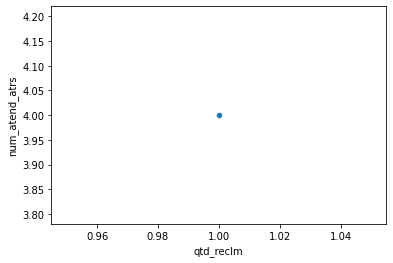

In [ ]:
df[(df['vlr_credito'].isna()) & (df['vlr_score'].isna())].plot(x="qtd_reclm",y="num_atend_atrs", kind="scatter")

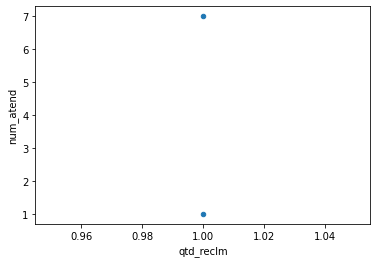

In [ ]:
df[(df['vlr_credito'].isna()) & (df['vlr_score'].isna())].plot(x="qtd_reclm",y="num_atend", kind="scatter")

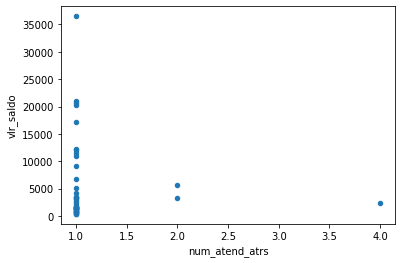

In [ ]:
df[(df['vlr_credito'].isna()) & (df['vlr_score'].isna())].plot(x="num_atend_atrs",y="vlr_saldo", kind="scatter")

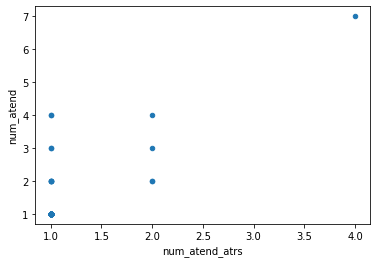

In [ ]:
df[(df['vlr_credito'].isna()) & (df['vlr_score'].isna())].plot(x="num_atend_atrs",y="num_atend", kind="scatter")

Valor de crédito NaN e valor de score que não é NaN

In [ ]:
df[(df['vlr_credito'].isna()) & (df['vlr_score'].notna())].describe()

,anomes,vlr_credito,vlr_saldo,num_atend_atrs,vlr_score,num_produtos,num_atend,qtd_oper,qtd_reclm,qtd_restr
count,2.617340e+06,0.0,3.862490e+05,248.000000,2.617340e+06,135639.000000,1332.000000,0.0,77.0,2.284582e+06
mean,2.021715e+05,NaN,6.395834e+03,1.072581,3.739851e+02,2.263670,1.361111,NaN,1.0,2.813592e+00
std,4.319554e+01,NaN,1.541056e+04,0.328742,1.543755e+02,1.463425,0.654009,NaN,0.0,3.666297e+00
min,2.021040e+05,NaN,1.000000e-02,1.000000,0.000000e+00,1.000000,1.000000,NaN,1.0,1.000000e+00
25%,2.021120e+05,NaN,1.027250e+03,1.000000,2.680000e+02,1.000000,1.000000,NaN,1.0,1.000000e+00
50%,2.022020e+05,NaN,2.935900e+03,1.000000,3.630000e+02,2.000000,1.000000,NaN,1.0,2.000000e+00
75%,2.022030e+05,NaN,7.399170e+03,1.000000,4.460000e+02,3.000000,2.000000,NaN,1.0,3.000000e+00
max,2.022040e+05,NaN,2.128072e+06,4.000000,1.000000e+03,12.000000,7.000000,NaN,1.0,1.950000e+02


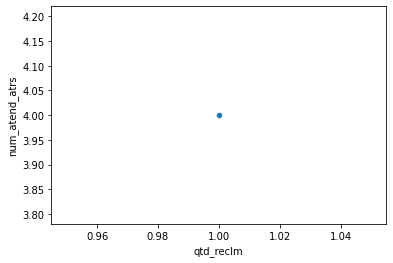

In [ ]:
df[(df['vlr_credito'].isna()) & (df['vlr_score'].notna())].plot(x="qtd_reclm",y="num_atend_atrs", kind="scatter")

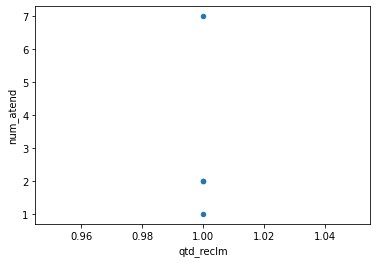

In [ ]:
df[(df['vlr_credito'].isna()) & (df['vlr_score'].notna())].plot(x="qtd_reclm",y="num_atend", kind="scatter")

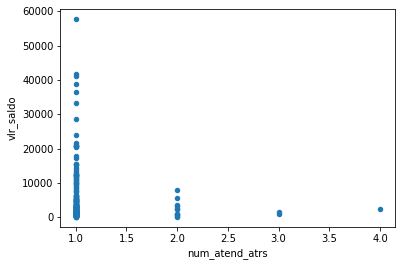

In [ ]:
df[(df['vlr_credito'].isna()) & (df['vlr_score'].notna())].plot(x="num_atend_atrs",y="vlr_saldo", kind="scatter")

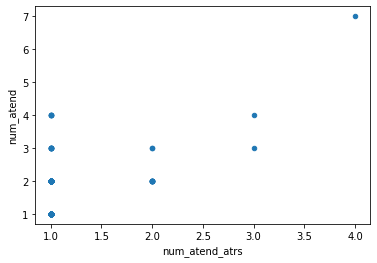

In [ ]:
df[(df['vlr_credito'].isna()) & (df['vlr_score'].notna())].plot(x="num_atend_atrs",y="num_atend", kind="scatter")

Valor de crédito NaN e valor de score que é NaN

In [ ]:
df[(df['vlr_credito'].isna()) & (df['vlr_score'].isna())].describe()

,anomes,vlr_credito,vlr_saldo,num_atend_atrs,vlr_score,num_produtos,num_atend,qtd_oper,qtd_reclm,qtd_restr
count,2.855479e+06,0.0,1.672110e+05,51.000000,0.0,22918.000000,293.000000,0.0,26.0,2.768583e+06
mean,2.021076e+05,NaN,6.992214e+03,1.137255,NaN,2.151060,1.313993,NaN,1.0,2.639258e+00
std,8.081409e+00,NaN,1.635865e+05,0.490698,NaN,1.259896,0.714605,NaN,0.0,3.502599e+00
min,2.021040e+05,NaN,1.000000e-02,1.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000e+00
25%,2.021050e+05,NaN,1.054560e+03,1.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000e+00
50%,2.021070e+05,NaN,2.716100e+03,1.000000,NaN,2.000000,1.000000,NaN,1.0,2.000000e+00
75%,2.021090e+05,NaN,7.137930e+03,1.000000,NaN,3.000000,1.000000,NaN,1.0,3.000000e+00
max,2.022040e+05,NaN,3.210277e+07,4.000000,NaN,11.000000,7.000000,NaN,1.0,4.130000e+02


<h3>Clientes que possuem créditos entre 0 e 287,4


Descrição geral

In [ ]:
df[(df.vlr_credito >= 0) & (df.vlr_credito <= 287.4) & (df.vlr_credito != df['vlr_credito'].isna())].describe()

,anomes,vlr_credito,vlr_saldo,num_atend_atrs,vlr_score,num_produtos,num_atend,qtd_oper,qtd_reclm,qtd_restr
count,105975.000000,105975.000000,63132.000000,80.000000,85943.000000,90478.000000,322.000000,105975.000000,1.0,48756.000000
mean,202131.577249,160.416959,2157.323657,1.175000,458.185169,1.419870,1.344720,3.630196,1.0,2.829888
std,40.948472,92.699483,5354.587706,0.497462,218.024531,0.731795,0.647872,2.539364,NaN,3.166462
min,202104.000000,0.010000,0.010000,1.000000,0.000000,1.000000,1.000000,1.000000,1.0,1.000000
25%,202107.000000,73.475000,225.090000,1.000000,291.000000,1.000000,1.000000,2.000000,1.0,1.000000
50%,202110.000000,196.750000,661.970000,1.000000,446.000000,1.000000,1.000000,3.000000,1.0,2.000000
75%,202112.000000,238.180000,1741.160000,1.000000,615.000000,2.000000,2.000000,5.000000,1.0,3.000000
max,202204.000000,287.400000,175667.190000,4.000000,987.000000,7.000000,5.000000,48.000000,1.0,75.000000


In [ ]:
df[(df.vlr_credito >= 0) & (df.vlr_credito <= 287.4) & (df['vlr_credito'].notna())]["cod_rating"].value_counts(normalize=True)

HH    0.550765
A     0.381080
H     0.031679
C     0.006504
D     0.005921
G     0.005435
E     0.005398
B     0.005231
F     0.005111
AA    0.002876
Name: cod_rating, dtype: float64

Score diferente de Nan

In [ ]:
df[(df.vlr_credito >= 0) & (df.vlr_credito <= 287.4) & (df['vlr_score'].notna()) & (df.vlr_credito != df['vlr_credito'].isna())].describe()

,anomes,vlr_credito,vlr_saldo,num_atend_atrs,vlr_score,num_produtos,num_atend,qtd_oper,qtd_reclm,qtd_restr
count,85943.000000,85943.000000,50075.000000,77.000000,85943.000000,82162.000000,296.000000,85943.000000,1.0,37709.000000
mean,202136.876569,163.538254,1508.055088,1.181818,458.185169,1.431696,1.347973,3.579128,1.0,2.755363
std,43.527675,91.581690,3564.136150,0.505946,218.024531,0.743854,0.656541,2.449465,NaN,3.112245
min,202104.000000,0.010000,0.010000,1.000000,0.000000,1.000000,1.000000,1.000000,1.0,1.000000
25%,202107.000000,80.365000,222.100000,1.000000,291.000000,1.000000,1.000000,2.000000,1.0,1.000000
50%,202110.000000,200.000000,500.000000,1.000000,446.000000,1.000000,1.000000,3.000000,1.0,2.000000
75%,202201.000000,239.530000,1329.910000,1.000000,615.000000,2.000000,2.000000,5.000000,1.0,3.000000
max,202204.000000,287.400000,128947.740000,4.000000,987.000000,7.000000,5.000000,47.000000,1.0,75.000000


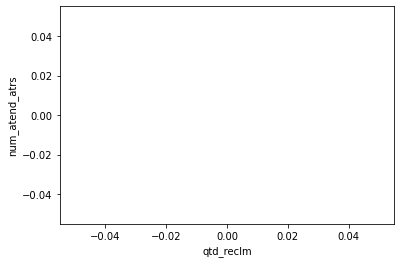

In [ ]:
df[(df.vlr_credito >= 0) & (df.vlr_credito <= 287.4) & (df['vlr_score'].notna()) & (df['vlr_credito'].notna())].plot(x="qtd_reclm",y="num_atend_atrs", kind="scatter")

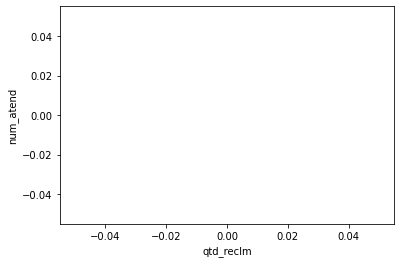

In [ ]:
df[(df.vlr_credito >= 0) & (df.vlr_credito <= 287.4) & (df['vlr_score'].notna()) & (df['vlr_credito'].notna())].plot(x="qtd_reclm",y="num_atend", kind="scatter")

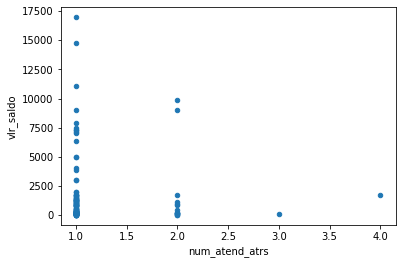

In [ ]:
df[(df.vlr_credito >= 0) & (df.vlr_credito <= 287.4) & (df['vlr_score'].notna()) & (df['vlr_credito'].notna())].plot(x="num_atend_atrs",y="vlr_saldo", kind="scatter")

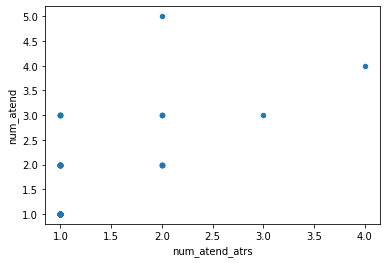

In [ ]:
df[(df.vlr_credito >= 0) & (df.vlr_credito <= 287.4) & (df['vlr_score'].notna()) & (df['vlr_credito'].notna())].plot(x="num_atend_atrs",y="num_atend", kind="scatter")

Score sendo NaN

In [ ]:
df[(df.vlr_credito >= 0) & (df.vlr_credito <= 287.4) & (df['vlr_score'].isna()) & (df['vlr_credito'].notna())].describe()

,anomes,vlr_credito,vlr_saldo,num_atend_atrs,vlr_score,num_produtos,num_atend,qtd_oper,qtd_reclm,qtd_restr
count,20032.000000,20032.000000,13057.000000,3.0,0.0,8316.00000,26.000000,20032.000000,0.0,11047.000000
mean,202108.841653,147.025716,4647.338484,1.0,NaN,1.30303,1.307692,3.849291,NaN,3.084276
std,10.228925,96.209518,9060.954304,0.0,NaN,0.58713,0.549125,2.883351,NaN,3.332535
min,202104.000000,0.010000,0.080000,1.0,NaN,1.00000,1.000000,1.000000,NaN,1.000000
25%,202106.000000,49.660000,564.560000,1.0,NaN,1.00000,1.000000,2.000000,NaN,1.000000
50%,202108.000000,169.055000,1538.660000,1.0,NaN,1.00000,1.000000,3.000000,NaN,2.000000
75%,202111.000000,232.980000,5563.540000,1.0,NaN,1.00000,1.750000,5.000000,NaN,4.000000
max,202204.000000,287.400000,175667.190000,1.0,NaN,6.00000,3.000000,48.000000,NaN,47.000000


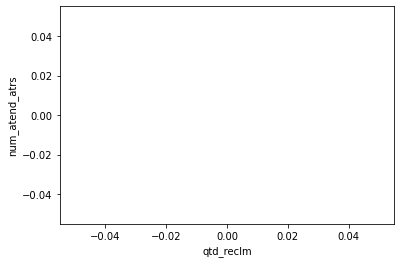

In [ ]:
df[(df.vlr_credito >= 0) & (df.vlr_credito <= 287.4) & (df['vlr_score'].isna()) & (df['vlr_credito'].notna())].plot(x="qtd_reclm",y="num_atend_atrs", kind="scatter")

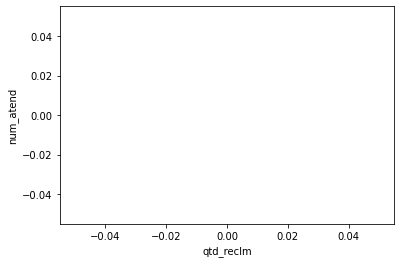

In [ ]:
df[(df.vlr_credito >= 0) & (df.vlr_credito <= 287.4) & (df['vlr_score'].isna()) & (df['vlr_credito'].notna())].plot(x="qtd_reclm",y="num_atend", kind="scatter")

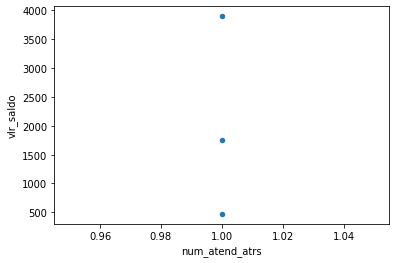

In [ ]:
df[(df.vlr_credito >= 0) & (df.vlr_credito <= 287.4) & (df['vlr_score'].isna()) & (df['vlr_credito'].notna())].plot(x="num_atend_atrs",y="vlr_saldo", kind="scatter")

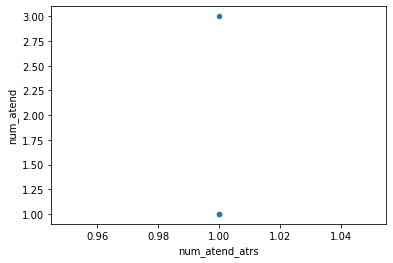

In [ ]:
df[(df.vlr_credito >= 0) & (df.vlr_credito <= 287.4) & (df['vlr_score'].isna()) & (df['vlr_credito'].notna())].plot(x="num_atend_atrs",y="num_atend", kind="scatter")

<h3>Clientes que possuem créditos entre 287,4 e 17015

Descrição geral

In [ ]:
df[(df.vlr_credito > 287.4) & (df.vlr_credito <= 17015) & (df['vlr_credito'].notna())].describe()

,anomes,vlr_credito,vlr_saldo,num_atend_atrs,vlr_score,num_produtos,num_atend,qtd_oper,qtd_reclm,qtd_restr
count,3.126313e+06,3.126313e+06,2.703966e+06,3318.000000,2.777186e+06,2.968431e+06,12639.000000,3.126313e+06,297.0,1.303050e+06
mean,2.021335e+05,6.914188e+03,3.106390e+03,1.119349,5.091258e+02,1.586713e+00,1.378748,9.328448e+00,1.0,2.876296e+00
std,4.191251e+01,5.099008e+03,4.272138e+03,0.382279,2.145268e+02,9.266044e-01,0.687529,7.128540e+00,0.0,3.163275e+00
min,2.021040e+05,2.874100e+02,1.000000e-02,1.000000,0.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.0,1.000000e+00
25%,2.021070e+05,2.264320e+03,7.292600e+02,1.000000,3.670000e+02,1.000000e+00,1.000000,5.000000e+00,1.0,1.000000e+00
50%,2.021100e+05,5.821750e+03,1.581100e+03,1.000000,5.080000e+02,1.000000e+00,1.000000,8.000000e+00,1.0,2.000000e+00
75%,2.022010e+05,1.120315e+04,3.681000e+03,1.000000,6.610000e+02,2.000000e+00,2.000000,1.200000e+01,1.0,4.000000e+00
max,2.022040e+05,1.701500e+04,3.793881e+05,6.000000,1.000000e+03,1.200000e+01,13.000000,2.540000e+02,1.0,1.190000e+02


In [ ]:
df[(df.vlr_credito > 287.4) & (df.vlr_credito <= 17015) & (df['vlr_credito'].notna())]["cod_rating"].value_counts(normalize=True)

A     0.804981
H     0.049326
HH    0.038729
C     0.018639
AA    0.018126
B     0.017112
D     0.016028
E     0.013540
F     0.012101
G     0.011418
Name: cod_rating, dtype: float64

Score sendo NaN

In [ ]:
df[(df.vlr_credito > 287.4) & (df.vlr_credito <= 17015) & (df['vlr_score'].isna()) & (df['vlr_credito'].notna())].describe()

,anomes,vlr_credito,vlr_saldo,num_atend_atrs,vlr_score,num_produtos,num_atend,qtd_oper,qtd_reclm,qtd_restr
count,349127.000000,349127.000000,282179.000000,181.000000,0.0,238422.000000,938.000000,349127.000000,16.0,174654.000000
mean,202111.265505,6187.876211,3801.548083,1.071823,NaN,1.494862,1.335821,8.381961,1.0,3.058115
std,14.073096,5021.317819,6424.880005,0.279546,NaN,0.811834,0.629425,6.820129,0.0,3.202514
min,202104.000000,287.440000,0.010000,1.000000,NaN,1.000000,1.000000,1.000000,1.0,1.000000
25%,202107.000000,1741.885000,797.780000,1.000000,NaN,1.000000,1.000000,4.000000,1.0,1.000000
50%,202111.000000,4686.680000,1751.510000,1.000000,NaN,1.000000,1.000000,7.000000,1.0,2.000000
75%,202111.000000,10096.820000,4481.270000,1.000000,NaN,2.000000,2.000000,11.000000,1.0,4.000000
max,202204.000000,17014.920000,379388.070000,3.000000,NaN,12.000000,5.000000,112.000000,1.0,100.000000


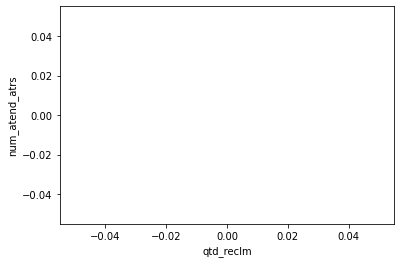

In [ ]:
df[(df.vlr_credito > 287.4) & (df.vlr_credito <= 17015) & (df.vlr_score == df['vlr_score'].isna()) & (df.vlr_credito != df['vlr_credito'].isna())].plot(x="qtd_reclm",y="num_atend_atrs", kind="scatter")

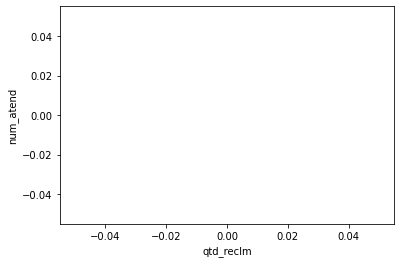

In [ ]:
df[(df.vlr_credito > 287.4) & (df.vlr_credito <= 17015) & (df.vlr_score == df['vlr_score'].isna()) & (df.vlr_credito != df['vlr_credito'].isna())].plot(x="qtd_reclm",y="num_atend", kind="scatter")

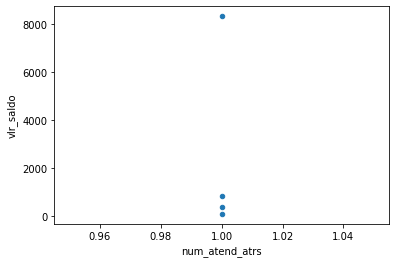

In [ ]:
df[(df.vlr_credito > 287.4) & (df.vlr_credito <= 17015) & (df.vlr_score == df['vlr_score'].isna()) & (df.vlr_credito != df['vlr_credito'].isna())].plot(x="num_atend_atrs",y="vlr_saldo", kind="scatter")

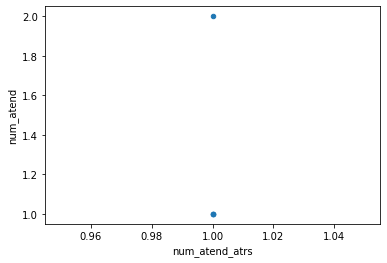

In [ ]:
df[(df.vlr_credito > 287.4) & (df.vlr_credito <= 17015) & (df.vlr_score == df['vlr_score'].isna()) & (df.vlr_credito != df['vlr_credito'].isna())].plot(x="num_atend_atrs",y="num_atend", kind="scatter")

Score não é NaN

In [ ]:
df[(df.vlr_credito > 287.4) & (df.vlr_credito <= 17015) & (df.vlr_score != df['vlr_score'].isna()) & (df.vlr_credito != df['vlr_credito'].isna())].describe()

,anomes,vlr_credito,vlr_saldo,num_atend_atrs,vlr_score,num_produtos,num_atend,qtd_oper,qtd_reclm,qtd_restr
count,3.124332e+06,3.124332e+06,2.702316e+06,3314.000000,2.775205e+06,2.966490e+06,12612.000000,3.124332e+06,295.0,1.302457e+06
mean,2.021335e+05,6.913657e+03,3.106778e+03,1.119493,5.094892e+02,1.586067e+00,1.379004,9.324735e+00,1.0,2.876150e+00
std,4.188966e+01,5.099202e+03,4.272750e+03,0.382487,2.141715e+02,9.256303e-01,0.687943,7.125158e+00,0.0,3.163221e+00
min,2.021040e+05,2.874100e+02,1.000000e-02,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.0,1.000000e+00
25%,2.021070e+05,2.263520e+03,7.292900e+02,1.000000,3.670000e+02,1.000000e+00,1.000000,5.000000e+00,1.0,1.000000e+00
50%,2.021100e+05,5.820640e+03,1.581300e+03,1.000000,5.080000e+02,1.000000e+00,1.000000,8.000000e+00,1.0,2.000000e+00
75%,2.022010e+05,1.120280e+04,3.681910e+03,1.000000,6.610000e+02,2.000000e+00,2.000000,1.200000e+01,1.0,4.000000e+00
max,2.022040e+05,1.701500e+04,3.793881e+05,6.000000,1.000000e+03,1.200000e+01,13.000000,2.540000e+02,1.0,1.190000e+02


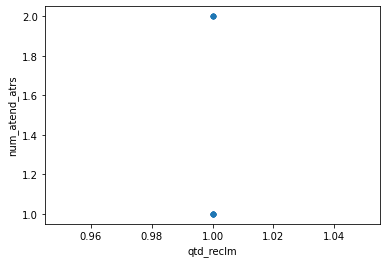

In [ ]:
df[(df.vlr_credito > 287.4) & (df.vlr_credito <= 17015) & (df.vlr_score != df['vlr_score'].isna()) & (df.vlr_credito != df['vlr_credito'].isna())].plot(x="qtd_reclm",y="num_atend_atrs", kind="scatter")

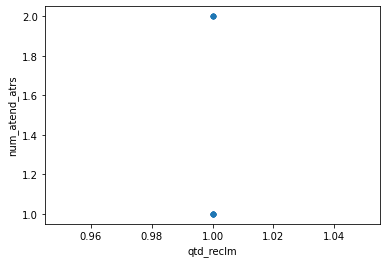

In [ ]:
df[(df.vlr_credito > 287.4) & (df.vlr_credito <= 17015) & (df.vlr_score != df['vlr_score'].isna()) & (df.vlr_credito != df['vlr_credito'].isna())].plot(x="qtd_reclm",y="num_atend_atrs", kind="scatter")

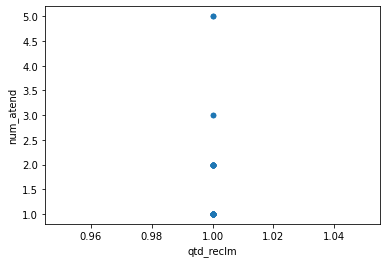

In [ ]:
df[(df.vlr_credito > 287.4) & (df.vlr_credito <= 17015) & (df.vlr_score != df['vlr_score'].isna()) & (df.vlr_credito != df['vlr_credito'].isna())].plot(x="qtd_reclm",y="num_atend", kind="scatter")

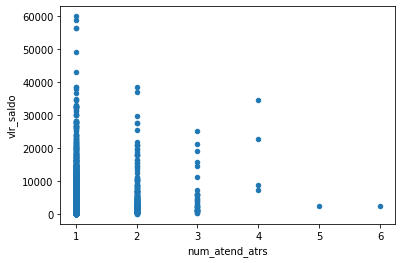

In [ ]:
df[(df.vlr_credito > 287.4) & (df.vlr_credito <= 17015) & (df.vlr_score != df['vlr_score'].isna()) & (df.vlr_credito != df['vlr_credito'].isna())].plot(x="num_atend_atrs",y="vlr_saldo", kind="scatter")

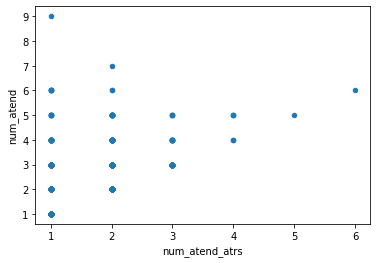

In [ ]:
df[(df.vlr_credito > 287.4) & (df.vlr_credito <= 17015) & (df.vlr_score != df['vlr_score'].isna()) & (df.vlr_credito != df['vlr_credito'].isna())].plot(x="num_atend_atrs",y="num_atend", kind="scatter")

<h3>Clientes que possuem créditos entre 17015 e 10348109

Descrição geral

In [ ]:
df[(df.vlr_credito > 17015) & (df.vlr_credito <= 10348109) & (df.vlr_credito != df['vlr_credito'].isna())].describe()

,anomes,vlr_credito,vlr_saldo,num_atend_atrs,vlr_score,num_produtos,num_atend,qtd_oper,qtd_reclm,qtd_restr
count,3.126329e+06,3.126329e+06,3.015075e+06,2775.000000,2.823680e+06,3.029464e+06,11310.000000,3.126329e+06,946.000000,1.495972e+06
mean,2.021340e+05,6.520529e+04,8.391424e+03,1.119279,5.332097e+02,1.685264e+00,1.382935,1.723141e+01,1.001057,3.282728e+00
std,4.212832e+01,8.749099e+04,1.504274e+04,0.400756,2.091319e+02,1.038799e+00,0.724037,1.111354e+01,0.032513,3.742358e+00
min,2.021040e+05,1.701501e+04,1.000000e-02,1.000000,0.000000e+00,1.000000e+00,1.000000,0.000000e+00,1.000000,1.000000e+00
25%,2.021070e+05,2.415304e+04,1.560000e+03,1.000000,3.820000e+02,1.000000e+00,1.000000,1.000000e+01,1.000000,1.000000e+00
50%,2.021100e+05,3.839937e+04,3.833790e+03,1.000000,5.040000e+02,1.000000e+00,1.000000,1.500000e+01,1.000000,2.000000e+00
75%,2.022010e+05,7.474287e+04,1.070906e+04,1.000000,6.780000e+02,2.000000e+00,2.000000,2.100000e+01,1.000000,4.000000e+00
max,2.022040e+05,1.027327e+07,1.777232e+06,7.000000,1.000000e+03,1.500000e+01,17.000000,3.060000e+02,2.000000,1.810000e+02


In [ ]:
df[(df.vlr_credito > 17015) & (df.vlr_credito <= 10348109) & (df.vlr_credito != df['vlr_credito'].isna())]["cod_rating"].value_counts(normalize=True)

A     0.877897
H     0.025387
HH    0.023330
B     0.017610
C     0.016043
D     0.011872
E     0.008794
F     0.007461
G     0.006524
AA    0.005082
Name: cod_rating, dtype: float64

Score é NaN

In [ ]:
df[(df.vlr_credito > 17015) & (df.vlr_credito <= 10348109) & (df.vlr_score == df['vlr_score'].isna()) & (df.vlr_credito != df['vlr_credito'].isna())].describe()

,anomes,vlr_credito,vlr_saldo,num_atend_atrs,vlr_score,num_produtos,num_atend,qtd_oper,qtd_reclm,qtd_restr
count,4269.000000,4.269000e+03,4072.000000,12.000000,4269.0,4244.000000,48.000000,4269.000000,9.0,1477.000000
mean,202202.629656,1.276650e+05,7379.100550,1.166667,0.0,2.854147,1.250000,30.829937,1.0,5.246445
std,1.085981,2.067808e+05,13879.915181,0.389249,0.0,1.786951,0.483779,18.630065,0.0,5.390716
min,202201.000000,1.703117e+04,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.0,1.000000
25%,202202.000000,3.396742e+04,1400.000000,1.000000,0.0,1.000000,1.000000,18.000000,1.0,1.000000
50%,202203.000000,6.971914e+04,3149.405000,1.000000,0.0,3.000000,1.000000,27.000000,1.0,3.000000
75%,202204.000000,1.417380e+05,8274.640000,1.000000,0.0,4.000000,1.000000,39.000000,1.0,7.000000
max,202204.000000,6.694689e+06,467111.080000,2.000000,0.0,13.000000,3.000000,199.000000,1.0,53.000000


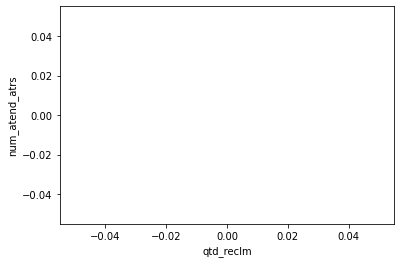

In [ ]:
df[(df.vlr_credito > 17015) & (df.vlr_credito <= 10348109) & (df.vlr_score == df['vlr_score'].isna()) & (df.vlr_credito != df['vlr_credito'].isna())].plot(x="qtd_reclm",y="num_atend_atrs", kind="scatter")

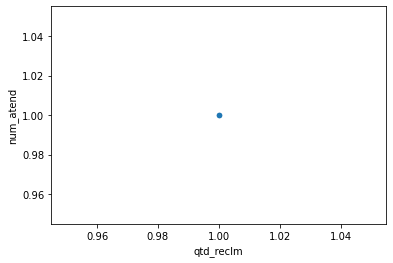

In [ ]:
df[(df.vlr_credito > 17015) & (df.vlr_credito <= 10348109) & (df.vlr_score == df['vlr_score'].isna()) & (df.vlr_credito != df['vlr_credito'].isna())].plot(x="qtd_reclm",y="num_atend", kind="scatter")

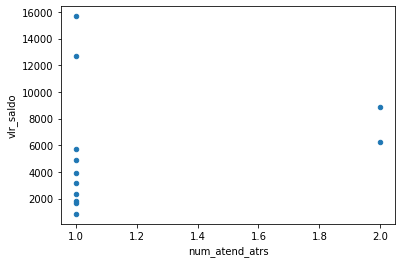

In [ ]:
df[(df.vlr_credito > 17015) & (df.vlr_credito <= 10348109) & (df.vlr_score == df['vlr_score'].isna()) & (df.vlr_credito != df['vlr_credito'].isna())].plot(x="num_atend_atrs",y="vlr_saldo", kind="scatter")

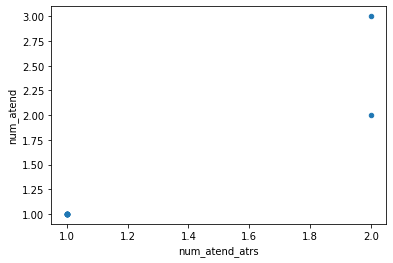

In [ ]:
df[(df.vlr_credito > 17015) & (df.vlr_credito <= 10348109) & (df.vlr_score == df['vlr_score'].isna()) & (df.vlr_credito != df['vlr_credito'].isna())].plot(x="num_atend_atrs",y="num_atend", kind="scatter")

Score não é NaN

In [ ]:
df[(df.vlr_credito > 17015) & (df.vlr_credito <= 10348109) & (df.vlr_score != df['vlr_score'].isna()) & (df.vlr_credito != df['vlr_credito'].isna())].describe()

,anomes,vlr_credito,vlr_saldo,num_atend_atrs,vlr_score,num_produtos,num_atend,qtd_oper,qtd_reclm,qtd_restr
count,3.122060e+06,3.122060e+06,3.011003e+06,2763.000000,2.819411e+06,3.025220e+06,11262.000000,3.122060e+06,937.000000,1.494495e+06
mean,2.021339e+05,6.511989e+04,8.392793e+03,1.119073,5.340170e+02,1.683625e+00,1.383502,1.721281e+01,1.001067,3.280787e+00
std,4.208059e+01,8.718569e+04,1.504421e+04,0.400861,2.082577e+02,1.036446e+00,0.724852,1.108837e+01,0.032669,3.739862e+00
min,2.021040e+05,1.701501e+04,1.000000e-02,1.000000,5.100000e+01,1.000000e+00,1.000000,0.000000e+00,1.000000,1.000000e+00
25%,2.021070e+05,2.414543e+04,1.560170e+03,1.000000,3.830000e+02,1.000000e+00,1.000000,1.000000e+01,1.000000,1.000000e+00
50%,2.021100e+05,3.837688e+04,3.834970e+03,1.000000,5.040000e+02,1.000000e+00,1.000000,1.500000e+01,1.000000,2.000000e+00
75%,2.022010e+05,7.466549e+04,1.071217e+04,1.000000,6.780000e+02,2.000000e+00,2.000000,2.100000e+01,1.000000,4.000000e+00
max,2.022040e+05,1.027327e+07,1.777232e+06,7.000000,1.000000e+03,1.500000e+01,17.000000,3.060000e+02,2.000000,1.810000e+02


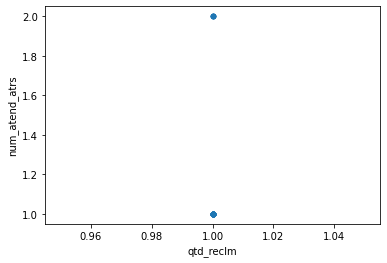

In [ ]:
df[(df.vlr_credito > 17015) & (df.vlr_credito <= 10348109) & (df.vlr_score != df['vlr_score'].isna()) & (df.vlr_credito != df['vlr_credito'].isna())].plot(x="qtd_reclm",y="num_atend_atrs", kind="scatter")

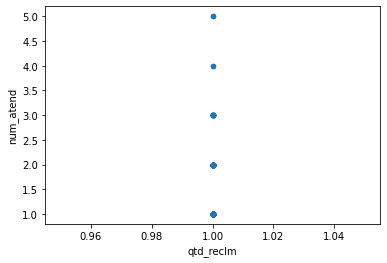

In [ ]:
df[(df.vlr_credito > 17015) & (df.vlr_credito <= 10348109) & (df.vlr_score != df['vlr_score'].isna()) & (df.vlr_credito != df['vlr_credito'].isna())].plot(x="qtd_reclm",y="num_atend", kind="scatter")

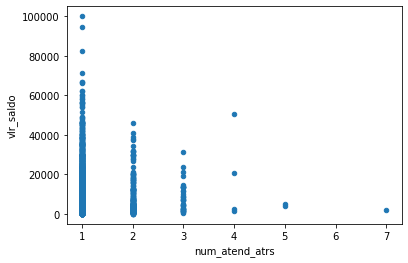

In [ ]:
df[(df.vlr_credito > 17015) & (df.vlr_credito <= 10348109) & (df.vlr_score != df['vlr_score'].isna()) & (df.vlr_credito != df['vlr_credito'].isna())].plot(x="num_atend_atrs",y="vlr_saldo", kind="scatter")

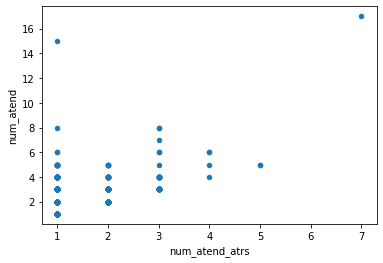

In [ ]:
df[(df.vlr_credito > 17015) & (df.vlr_credito <= 10348109) & (df.vlr_score != df['vlr_score'].isna()) & (df.vlr_credito != df['vlr_credito'].isna())].plot(x="num_atend_atrs",y="num_atend", kind="scatter")

#Análise de atendimento


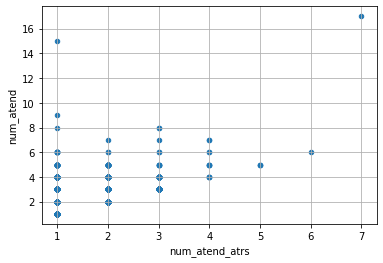

In [ ]:
df[df.num_atend > 0].plot(x="num_atend_atrs",y="num_atend", kind="scatter", use_index=False, grid=True)

In [ ]:
len(df[df.qtd_reclm > 0])/len(df[df.num_atend > 0])

0.05138444151440949

In [ ]:
len(df[df.qtd_reclm > 0])/len(df)

0.00010907381378429118

#Outros testes

In [ ]:
df.plot(x="qtd_reclm",y="num_atend", kind="bar")

In [ ]:
df_new[df_new.credito > 287.4].describe()

In [ ]:
|px.box(df_new[df_new.credito < 18000], y="credito")

In [ ]:
df_new.describe()

In [ ]:
|df_new.std()

In [ ]:
df_new.mean()

In [ ]:
df_new[(df_new > 10000)].count()/len(df_new)

In [ ]:
df_new[(df_new > 20000)].count()/len(df_new)

In [ ]:
df_new[(df_new > 30000)].count()/len(df_new)

In [ ]:
df_new[(df_new > 50000)].count()/len(df_new)

In [ ]:
df_new[(df_new > 100000)].count()/len(df_new)

In [ ]:
df_new[(df_new > 200000)].count()/len(df_new)

In [ ]:
df[(df.vlr_saldo < 2500) & (df.vlr_credito != 0)].count()/len(df)

In [ ]:
len(df.loc[(df.vlr_saldo < 5000) & (df.vlr_credito != 0), :])/len(df)